import lib

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as skl
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
import scipy

import dataset

In [0]:
df = pd.read_csv('/content/house_price_predict.csv')

look on data and delete 1 column



In [0]:
df = df.iloc[:, 1:15]
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.000013,0.035997,0.004620,0.0,0.001076,0.013149,0.130388,0.008179,0.002000,0.591945,0.030597,0.793727,0.009959,24.0
1,0.000058,0.000000,0.014977,0.0,0.000994,0.013602,0.167140,0.010522,0.004237,0.512648,0.037707,0.840785,0.019362,21.6
2,0.000059,0.000000,0.015174,0.0,0.001007,0.015421,0.131140,0.010661,0.004293,0.519409,0.038204,0.843138,0.008650,34.7
3,0.000071,0.000000,0.004785,0.0,0.001005,0.015360,0.100527,0.013306,0.006585,0.487268,0.041045,0.866174,0.006453,33.4
4,0.000151,0.000000,0.004755,0.0,0.000999,0.015587,0.118209,0.013222,0.006543,0.484177,0.040784,0.865631,0.011625,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.000130,0.000000,0.024679,0.0,0.001185,0.013638,0.142942,0.005127,0.002069,0.564735,0.043441,0.810881,0.020004,22.4
502,0.000093,0.000000,0.024421,0.0,0.001173,0.012528,0.157005,0.004683,0.002047,0.558831,0.042987,0.812455,0.018587,20.6
503,0.000124,0.000000,0.024301,0.0,0.001167,0.014210,0.185364,0.004415,0.002037,0.556091,0.042776,0.808470,0.011488,23.9
504,0.000225,0.000000,0.024455,0.0,0.001175,0.013927,0.183053,0.004897,0.002050,0.559613,0.043047,0.806519,0.013283,22.0


select x, y

In [0]:
y = (df['Price'])
X = (df.iloc[:,:-1])

check NAN in data

In [0]:
np.unique(X[:])

array([0.00000000e+00, 1.26388341e-05, 1.82678055e-05, ...,
                  nan,            nan,            nan])

replace nan to 0

In [0]:
X = X.fillna(0)

replace to mean

In [0]:
X_mean = (df.iloc[:,:-1])
X_mean['RM'] = X_mean['RM'].fillna(X_mean['RM'].mean())
X_mean['PTRATIO'] = X_mean['PTRATIO'].fillna(X_mean['PTRATIO'].mean())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Train/ test split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, random_state=42)
X_train_mean, X_test_mean, y_train_mean, y_test_mean = train_test_split(X_mean, y, 
                                                    test_size=0.2, random_state=42)

linear model training score

In [0]:
model = linear_model.LinearRegression()
model.fit(X_train, y_train)
score = model.score(X_test, y_test)

In [0]:
y_pred = model.predict(X_test)
r2_score_zero = r2_score(y_test, y_pred)
r2_score_zero

0.6315358059293079

Same for mean replace

In [0]:
model_mean = linear_model.LinearRegression()
model_mean.fit(X_train_mean, y_train_mean)
score = model.score(X_test_mean, y_test_mean)
y_pred_mean = model.predict(X_test_mean)
r2_score_mean = r2_score(y_test_mean, y_pred_mean)
r2_score_mean

0.6513594255037705

plot

In [0]:
model.coef_[9] 

-23.77915285119197

<function matplotlib.pyplot.show>

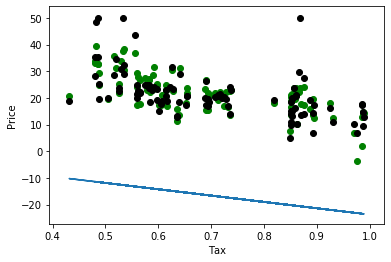

In [0]:
plt.scatter(X_test['TAX'], y_pred, color = 'Green')
plt.scatter(X_test['TAX'], y_test, color = 'Black')
plt.plot(X_test['TAX'], model.coef_[9]*X_test['TAX'] )  
plt.xlabel('Tax')
plt.ylabel('Price')
plt.show

<function matplotlib.pyplot.show>

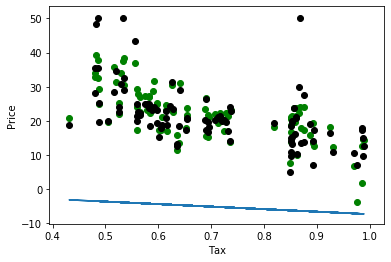

In [0]:
plt.scatter(X_test_mean['TAX'], y_pred_mean, color = 'Green')
plt.scatter(X_test_mean['TAX'], y_test_mean, color = 'Black')
plt.plot(X_test['TAX'], model_mean.coef_[9]*X_test['TAX'])  
plt.xlabel('Tax')
plt.ylabel('Price')
plt.show

# Lab 2
import data

In [0]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer(return_X_y=False)

In [0]:
df = pd.DataFrame(data['data'], columns=data['feature_names'])
df['class'] = data['target']

visualize data 

In [0]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


Split data

In [0]:
y = np.array(df['class'])
X = np.array(df.iloc[:, :-1])

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, random_state=42)

implement logistic regression recieve score

In [0]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression() 

In [0]:
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
print(model.score(X_test, y_test))

0.956140350877193


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic model for 2 features

In [0]:
model_plt = LogisticRegression()
model_plt.fit(X_train[:, 0:2], y_train)
print(model_plt.score(X_test[:, 0:2], y_test))

0.8596491228070176


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Plot graph

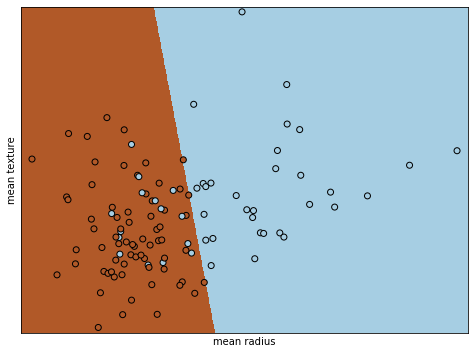

In [0]:
x_min, x_max = X_test[:, 0].min() - .5, X_test[:, 0].max() + .5
y_min, y_max = X_test[:, 1].min() - .5, X_test[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = model_plt.predict(np.c_[xx.ravel(), yy.ravel()])

#Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(8, 6))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
#plt.plot(model.coef_[0][0]*X_test[:, 0] +  model.coef_[0][1]*X_test[:, 1] + model.intercept_[0])
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel(data['feature_names'][0])
plt.ylabel(data['feature_names'][1])

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

In [0]:
plt.figure(1, figsize=(10, 7.5))
plt.clf()
i = 1
plt.scatter(X_test[:,i], y_test, color='black')
X_uniform = np.arange(-200, 200, 0.1)
loss = X_uniform * model.coef_[0][0] + model.intercept_[0]
loss = scipy.special.expit(loss)
plt.plot( loss, color='red', linewidth=3)

plt.ylabel('y')
plt.xlabel('X')
plt.legend(('Logistic Regression Model',),
           loc="lower right")
plt.tight_layout()
plt.show()